In [37]:
#importing required modules
from sklearn.datasets import fetch_california_housing
import pandas as pd
from  sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
#Linear regressor
from sklearn.linear_model import LinearRegression
#DecisionTreeRegressor,gradientBoostingRegressor,RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import  DecisionTreeRegressor
import matplotlib.pyplot as plt



#preformance metrices
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [6]:
data = fetch_california_housing(as_frame = True)
data = data.frame
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
#checking null values
data.isnull().sum()
# no null values

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [11]:
#Features and target
X = data.drop('MedHouseVal',axis = 1)
y = data.MedHouseVal
#splitting the data
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=32)
#nrmailizing the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
#very important
# Use fit_transform: For the training data, to calculate and apply scaling based on its statistics.
# Use transform: For the testing data, to apply the same scaling as the training data without recalculating parameters.
# This ensures consistent preprocessing while preventing data leakage.

In [17]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print(f'Mean Squared Error = {mean_squared_error(y_pred=y_pred,y_true=y_test)}')
print(f'R2 Score  = {r2_score(y_pred=y_pred,y_true=y_test)}')
print(f'Mean Absolute Error  = {mean_absolute_error(y_pred=y_pred,y_true=y_test)}')


Mean Squared Error = 0.5562501603591292
R2 Score  = 0.5931772566567302
Mean Absolute Error  = 0.5396073491710036


In [23]:
# working with advanced models

#DecisionTreeRegressor
dT_model = DecisionTreeRegressor(random_state=43)
dT_model.fit(x_train,y_train)
dT_model_pred = dT_model.predict(x_test)

#RandomForestReqressor
rF_model = RandomForestRegressor(n_estimators=100,random_state=41)
rF_model.fit(x_train,y_train)
rF_model_pred = rF_model.predict(x_test)

#GradientBoostingRegressor
gB_Model = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,random_state=42)
gB_Model.fit(x_train,y_train)
gB_Model_pred = gB_Model.predict(x_test)


# Evaluate each model
for model_name, y_pred in zip(
    ['Decision Tree', 'Random Forest', 'Gradient Boosting'],
    [dT_model_pred, rF_model_pred, gB_Model_pred]
):
    print(f"{model_name} - MSE: {mean_squared_error(y_test, y_pred)}, R²: {r2_score(y_test, y_pred)}")

Decision Tree - MSE: 0.5111009706097868, R²: 0.6261978623886811
Random Forest - MSE: 0.26064687708829953, R²: 0.809371600877458
Gradient Boosting - MSE: 0.29602220042591965, R²: 0.7834992737979039


In [26]:
models = [dT_model,rF_model,gB_Model]
model_names =  ['Decision Tree', 'Random Forest', 'Gradient Boosting']
for model, name in zip(models, model_names):
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    print(f"{name} - Average MSE: {-scores.mean()}")

Decision Tree - Average MSE: 0.8062924705061532
Random Forest - Average MSE: 0.4332529219128311
Gradient Boosting - Average MSE: 0.4124812411291844


In [32]:
#using grid searchCV to identify best parameters for randomForestregressor

param_grid = {
    'n_estimators': [50 ,200],
    'max_depth': [None,20],
    'min_samples_split': [6,10]
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),param_grid=param_grid,cv=2,scoring = 'neg_mean_squared_error')
grid_search.fit(X,y)
print(f"Best parameters: {grid_search.best_params_}")


Best parameters: {'max_depth': 20, 'min_samples_split': 6, 'n_estimators': 50}


/media/hanzalak/Hanzala/Projects/90daysof_ml/env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


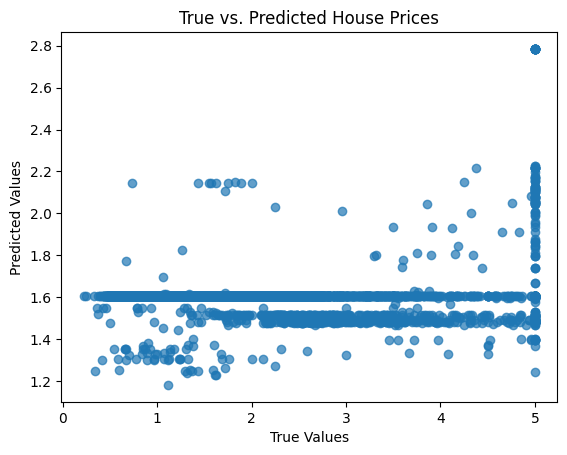

In [38]:

best_model = grid_search.best_estimator_
y_best_pred = best_model.predict(x_test)

plt.scatter(y_test, y_best_pred, alpha=0.7)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted House Prices")
plt.show()